In [112]:
from COSMethod1D import *
from heston_simulations import cir_chi_sq_sample, simulate_paths_heston_andersen

In [113]:
@dataclass
class MCParameters:
    number_of_paths: int
    number_of_steps: int

In [114]:
heston_parameters = HestonParameters(kappa = 1.3, gamma = 0.3, rho = -0.3, vbar = 0.05, v0 = 0.1)
state = MarketState(stock_price = 1, interest_rate = 0.06, dividends_rate = 0)
mc_parameters = MCParameters(5000, 250) 
maturity = 1

In [115]:
time_grid = np.linspace(0.0001, 1, 251)
number_of_paths = mc_parameters.number_of_paths
heston_asset = simulate_paths_heston_andersen(time_grid, number_of_paths, state, heston_parameters)["asset"]

In [116]:
strikes = np.linspace(0.5, 1.5, 50)
times = np.array([maturity])

characteristic_function = ChFHestonModel(state, heston_parameters, 1)

calls = CallStockOption(strike_price=strikes.reshape(1, -1),
                        expiration_time=times.reshape(-1, 1))

In [117]:
mc_option_price = np.zeros(len(strikes))
for i, K in enumerate(strikes):
    mc_option_price[i] = EUOptionPriceFromMCPaths(is_call=True, stock_price=heston_asset[:, -1], 
                                                  strikes=np.array([K]), time_to_maturity=times, 
                                                  interest_rate=state.interest_rate)

In [118]:
cos_option_price = OptionPriceWithCosMethodHelp(is_call=True, time_to_maturity=times, 
                             strikes=strikes, state=state, heston_parameters=heston_parameters,
                             N=500, L=8)

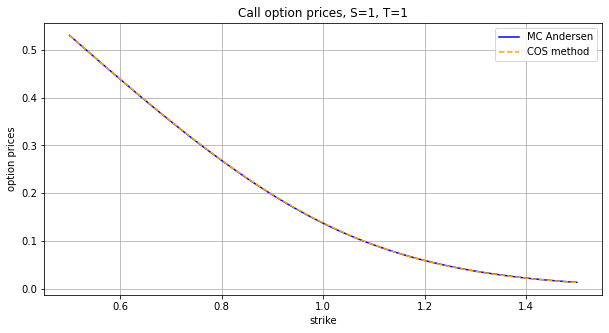

In [119]:
plt.figure(figsize=(10, 5))

plt.title("Call option prices, S=1, T=1")

plt.plot(strikes, mc_option_price, color="blue")
plt.plot(strikes, cos_option_pirce, "--", color='orange')
plt.grid()
plt.xlabel('strike')
plt.ylabel('option prices')
plt.legend(['MC Andersen','COS method'])
plt.grid(True)
plt.show()

In [120]:
iv_mc = np.zeros(len(mc_option_price))
for i, price in enumerate(mc_option_price):
    k = strikes[i]
    iv_mc[i] = ImpliedVolatility(is_call=True, option_market_price=price, 
                                 time_to_maturity=times, state=state, strikes=k)
    
iv_cos = np.zeros(len(cos_option_price))
for i, price in enumerate(cos_option_price):
    k = strikes[i]
    iv_cos[i] = ImpliedVolatility(is_call=True, option_market_price=price, 
                                  time_to_maturity=times, state=state, strikes=k)

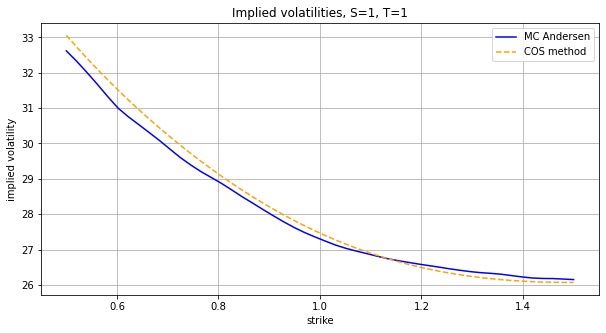

In [123]:
plt.figure(figsize=(10, 5))

plt.title("Implied volatilities, S=1, T=1")

plt.plot(strikes, iv_mc * 100, color="blue")
plt.plot(strikes, iv_cos * 100, "--", color='orange')
plt.grid()
plt.xlabel('strike')
plt.ylabel('implied volatility')
plt.legend(['MC Andersen','COS method'])
plt.grid(True)
plt.show()